In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mygrad.components as mc
import mygrad.functional as mf
from mygrad.losses import MeanSquareErrorLoss
from mygrad.optimizers import SGD, RMSProp
from mygrad.preprocessors import MinMaxScaler, StandardScaler, IdentityScaler
from mygrad.trainers import Trainer as RegressionTrainer, ProgressBar
from mygrad.dataloaders import NumpyRegressionDataloader

# Multimodal large

In [11]:
train_df = pd.read_csv("../mio1/regression/multimodal-large-training.csv")
test_df = pd.read_csv("../mio1/regression/multimodal-large-test.csv")

In [12]:
X_train = train_df["x"].values
y_train = train_df["y"].values

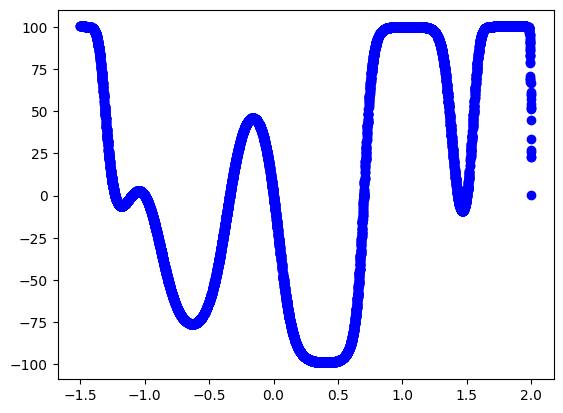

In [13]:
p = np.argsort(X_train)
plt.plot(X_train[p], y_train[p], "bo")

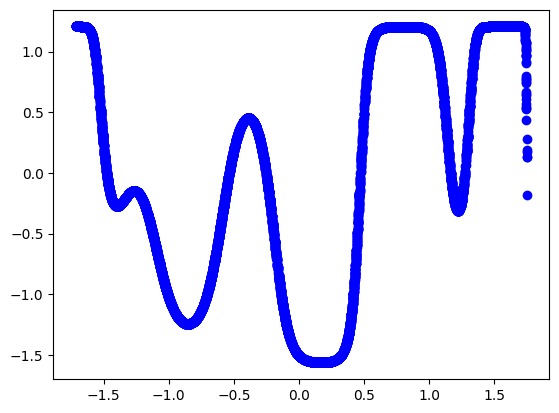

In [38]:
input_normalizer = StandardScaler()
output_normalizer = StandardScaler()

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_train_scaled = input_normalizer.fit_transform(X_train)
y_train_scaled = output_normalizer.fit_transform(y_train)

plt.plot(X_train_scaled[p, :], y_train_scaled[p, :], "bo")

In [15]:
len(X_train)

10000

## SGD

In [47]:
model = mc.Sequential(
    mc.Linear(1, 30, init="he"),
    mc.ReLU(),
    mc.Linear(30, 30, init="he"),
    mc.ReLU(),
    mc.Linear(30, 30, init="he"),
    mc.ReLU(),
    mc.Linear(30, 30, init="he"),
    mc.ReLU(),
    mc.Linear(30, 1, init="uniform"),
)
optimizer = SGD(model.parameters(), learning_rate=0.01, momentum=0.5, dampening=0.5)
loss = MeanSquareErrorLoss()
train_dataloader = NumpyRegressionDataloader(X_train_scaled, y_train_scaled, batch_size=10, shuffle=True)
trainer = RegressionTrainer(model, optimizer, loss, train_dataloader, plugins=[ProgressBar()])
train_losses_sgd = trainer.train(200)["loss"]

Training epochs:   0%|          | 0/200 [00:00<?, ?it/s]

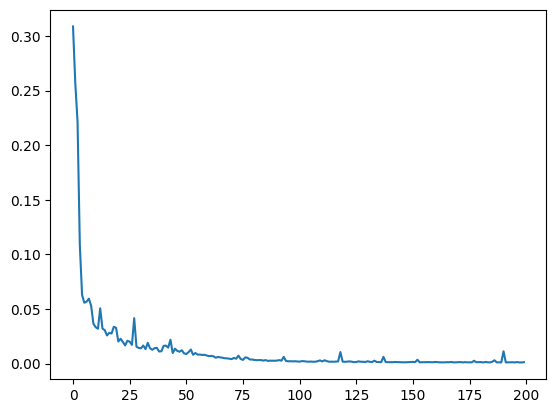

In [48]:
plt.plot(train_losses_sgd)

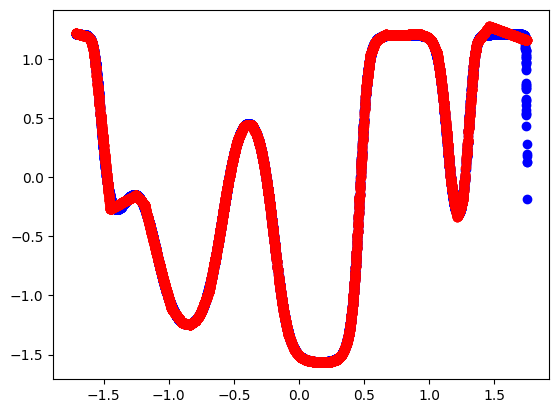

In [68]:
y_pred = model.forward(X_train_scaled)
plt.plot(X_train_scaled, y_train_scaled, "bo")
plt.plot(X_train_scaled, y_pred, "ro")


MSE: [2.43547033]


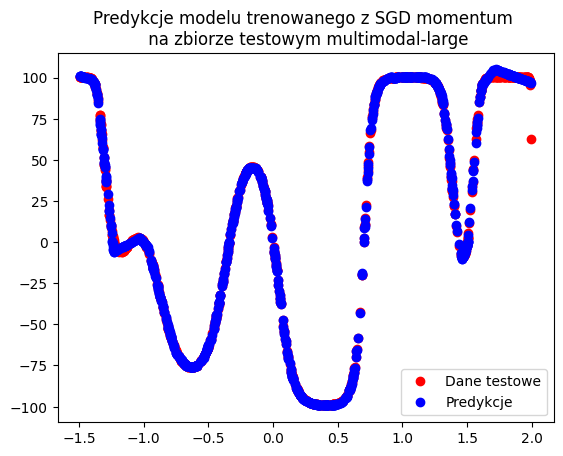

In [73]:
X_test = test_df["x"].values.reshape(-1, 1)
y_test = test_df["y"].values.reshape(-1, 1)

X_test_scaled = input_normalizer.transform(X_test)

y_pred_scaled = model.forward(X_test_scaled)
y_pred = output_normalizer.reverse(y_pred_scaled)

plt.plot(X_test, y_test, "ro", label="Dane testowe")
plt.plot(X_test, y_pred, "bo", label="Predykcje")
plt.title("Predykcje modelu trenowanego z SGD momentum \n na zbiorze testowym multimodal-large")
plt.legend()

print(f"MSE: {mf.mse(y_pred, y_test)}")


## RMSProp

In [58]:
model = mc.Sequential(
    mc.Linear(1, 30, init="xavier"),
    mc.Tanh(),
    mc.Linear(30, 30, init="xavier"),
    mc.Tanh(),
    mc.Linear(30, 30, init="xavier"),
    mc.Tanh(),
    mc.Linear(30, 30, init="xavier"),
    mc.Tanh(),
    mc.Linear(30, 1, init="uniform"),
)
optimizer = RMSProp(model.parameters(), learning_rate=0.0001, beta=0.9)
loss = MeanSquareErrorLoss()
train_dataloader = NumpyRegressionDataloader(X_train_scaled, y_train_scaled, batch_size=20, shuffle=True)
trainer = RegressionTrainer(model, optimizer, loss, train_dataloader, plugins=[ProgressBar()])
train_losses_rms = trainer.train(200)["loss"]

Training epochs:   0%|          | 0/200 [00:00<?, ?it/s]

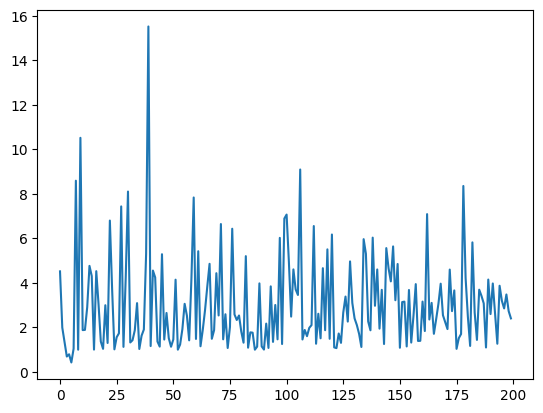

In [55]:
plt.plot(train_losses_rms)

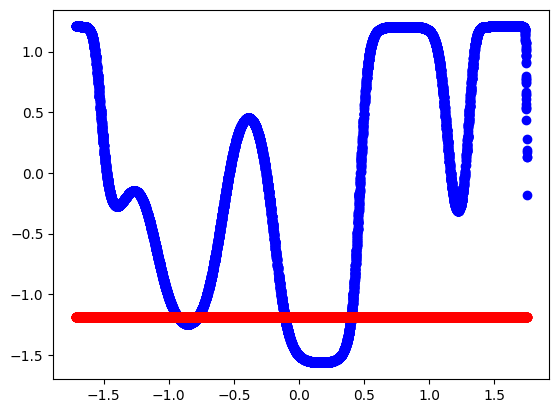

In [56]:
y_pred = model.forward(X_train_scaled)
plt.plot(X_train_scaled, y_train_scaled, "bo")
plt.plot(X_train_scaled, y_pred, "ro")


MSE: [12547.9717795]


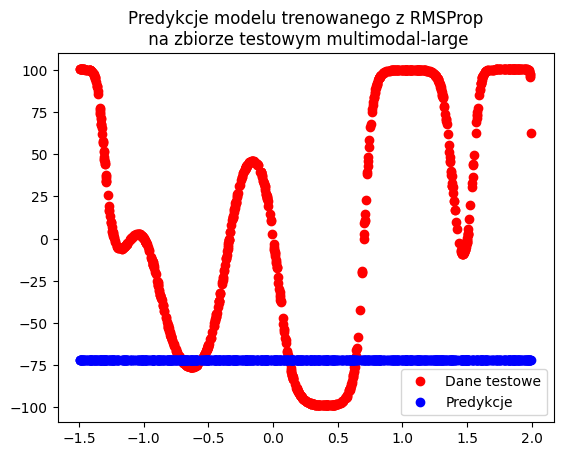

In [57]:
X_test = test_df["x"].values.reshape(-1, 1)
y_test = test_df["y"].values.reshape(-1, 1)

X_test_scaled = input_normalizer.transform(X_test)

y_pred_scaled = model.forward(X_test_scaled)
y_pred = output_normalizer.reverse(y_pred_scaled)

plt.plot(X_test, y_test, "ro", label="Dane testowe")
plt.plot(X_test, y_pred, "bo", label="Predykcje")
plt.title("Predykcje modelu trenowanego z RMSProp\n na zbiorze testowym multimodal-large")
plt.legend()

print(f"MSE: {mf.mse(y_pred, y_test)}")


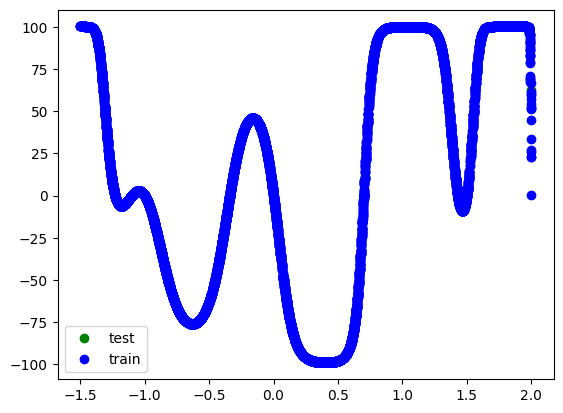

In [82]:
plt.plot(X_test, y_test, "go", label="test")
plt.plot(X_train, y_train, "bo", label="train")
plt.legend()

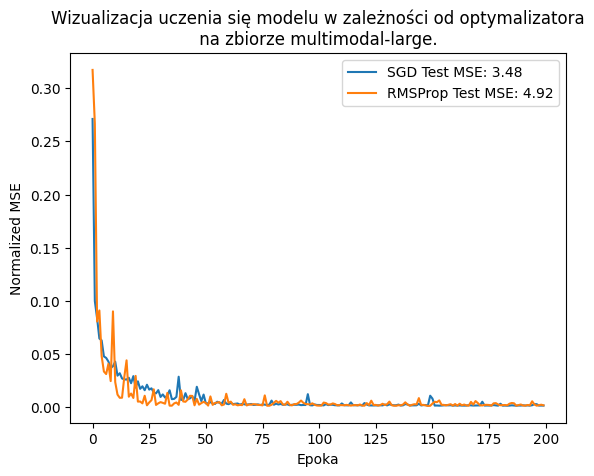

In [62]:
plt.plot(train_losses_sgd, label="SGD Test MSE: 3.48")
plt.plot(train_losses_rms, label="RMSProp Test MSE: 4.92")
plt.xlabel("Epoka")
plt.ylabel("Normalized MSE")
plt.legend()
plt.title("Wizualizacja uczenia się modelu w zależności od optymalizatora\n na zbiorze multimodal-large. ")
plt.show()